# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

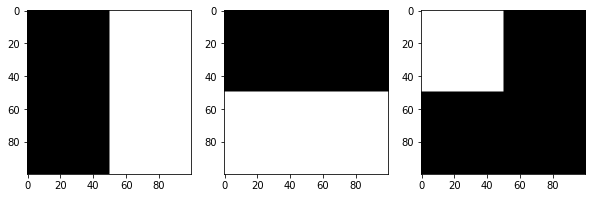

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


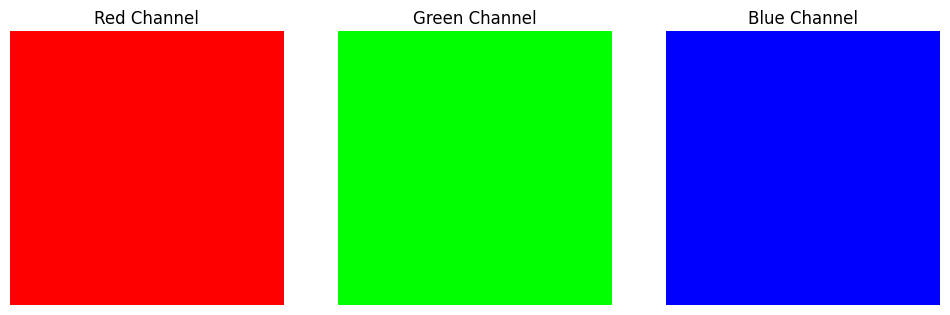

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the image
height, width = 100, 100

# Create three images with distinct color channels
red_image = np.zeros((height, width, 3), dtype=np.uint8)
red_image[:, :, 0] = 255  # Red channel

green_image = np.zeros((height, width, 3), dtype=np.uint8)
green_image[:, :, 1] = 255  # Green channel

blue_image = np.zeros((height, width, 3), dtype=np.uint8)
blue_image[:, :, 2] = 255  # Blue channel

# Visualize the images in a 1 x 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(red_image)
axes[0].set_title("Red Channel")
axes[0].axis('off')

axes[1].imshow(green_image)
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(blue_image)
axes[2].set_title("Blue Channel")
axes[2].axis('off')

plt.show()

*   Use the above three images to create the following image

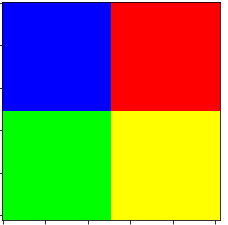
*Hint: Remember channels and color spaces*

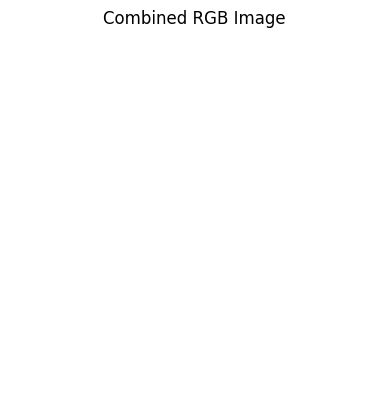

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the images
height, width = 100, 100

# Create three separate color channels
red_channel = np.zeros((height, width, 3), dtype=np.uint8)
red_channel[:, :, 0] = 255  # Full red

green_channel = np.zeros((height, width, 3), dtype=np.uint8)
green_channel[:, :, 1] = 255  # Full green

blue_channel = np.zeros((height, width, 3), dtype=np.uint8)
blue_channel[:, :, 2] = 255  # Full blue

# Combine the channels by stacking them
combined_image = np.zeros((height, width, 3), dtype=np.uint8)
combined_image[:, :, 0] = red_channel[:, :, 0]
combined_image[:, :, 1] = green_channel[:, :, 1]
combined_image[:, :, 2] = blue_channel[:, :, 2]

# Display the resulting combined image
plt.imshow(combined_image)
plt.title("Combined RGB Image")
plt.axis('off')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

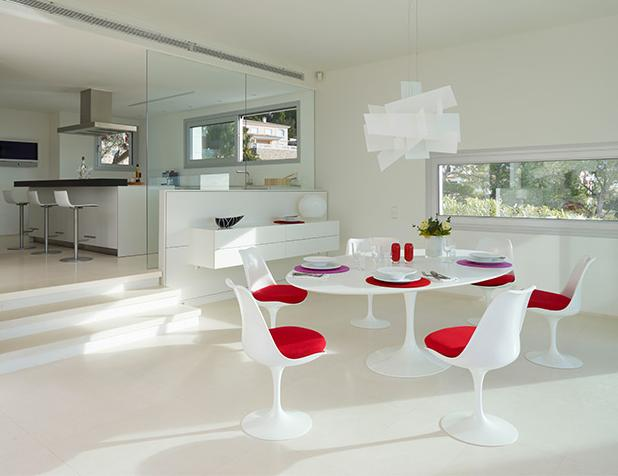

*   Extract individual channels and plot them using matplotlib subplot.



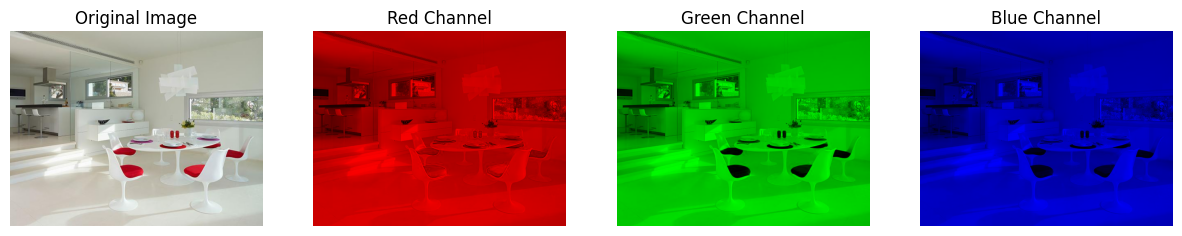

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image from the 'images' folder
image_path = 'images/sillas.jpg'  # Update this path if needed
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into R, G, B channels
r_channel = image_rgb.copy()
r_channel[:, :, 1] = 0  # Zero out green
r_channel[:, :, 2] = 0  # Zero out blue

g_channel = image_rgb.copy()
g_channel[:, :, 0] = 0  # Zero out red
g_channel[:, :, 2] = 0  # Zero out blue

b_channel = image_rgb.copy()
b_channel[:, :, 0] = 0  # Zero out red
b_channel[:, :, 1] = 0  # Zero out green

# Plot the original image and each color channel in a 1x4 subplot
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(r_channel)
axes[1].set_title("Red Channel")
axes[1].axis('off')

axes[2].imshow(g_channel)
axes[2].set_title("Green Channel")
axes[2].axis('off')

axes[3].imshow(b_channel)
axes[3].set_title("Blue Channel")
axes[3].axis('off')

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

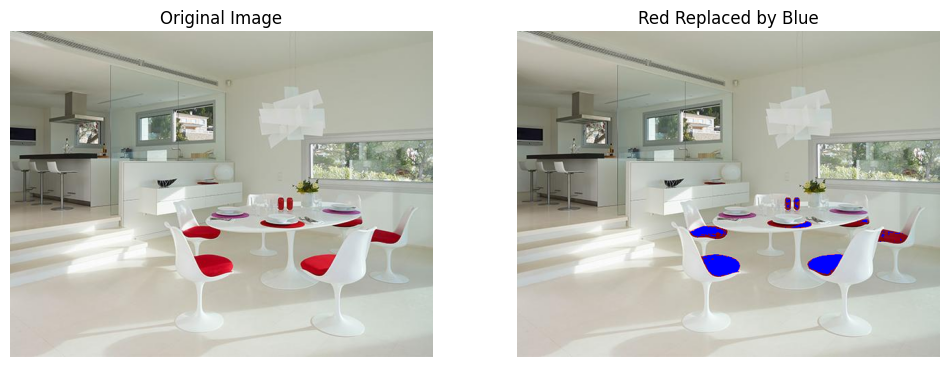

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the 'images' folder
image_path = 'images/sillas.jpg'  # Update this path if needed
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a copy of the image to manipulate
modified_image = image_rgb.copy()

# Define a threshold to detect "red" pixels
# Adjust these values as needed to capture all the red tones
red_threshold = 150
green_threshold = 100
blue_threshold = 100

# Replace red with blue where red channel is dominant
# A pixel is considered "red" if the red value is significantly higher than green and blue
red_pixels = (modified_image[:, :, 0] > red_threshold) & \
             (modified_image[:, :, 1] < green_threshold) & \
             (modified_image[:, :, 2] < blue_threshold)

# Set these "red" pixels to blue
modified_image[red_pixels] = [0, 0, 255]  # RGB for blue

# Plot the original image and the modified image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(modified_image)
axes[1].set_title("Red Replaced by Blue")
axes[1].axis('off')

plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

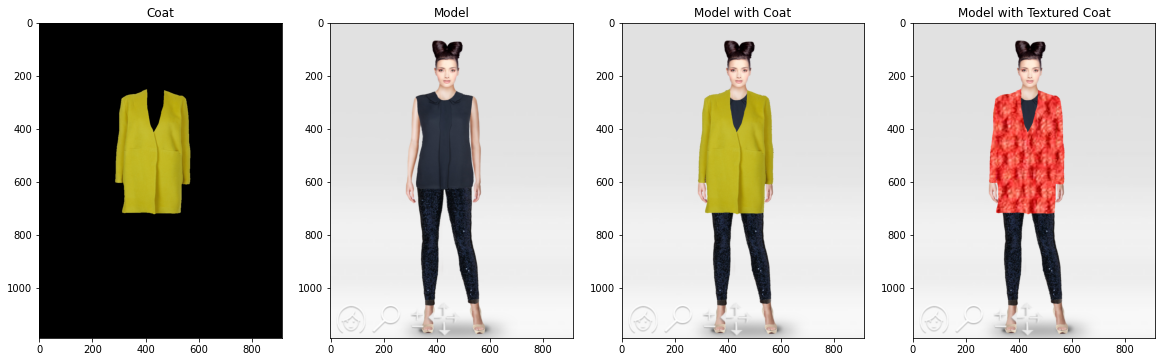

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
model_path = 'images/model.png'
coat_path = 'images/coat.png'
texture_path = 'images/texture1.png'  # Choose a texture image here

model_image = cv2.imread(model_path)
coat_image = cv2.imread(coat_path)
texture_image = cv2.imread(texture_path)

# Convert images to RGB
model_image_rgb = cv2.cvtColor(model_image, cv2.COLOR_BGR2RGB)
coat_image_rgb = cv2.cvtColor(coat_image, cv2.COLOR_BGR2RGB)
texture_image_rgb = cv2.cvtColor(texture_image, cv2.COLOR_BGR2RGB)

# Resize texture to match the coat's dimensions
texture_resized = cv2.resize(texture_image_rgb, (coat_image.shape[1], coat_image.shape[0]))

# Convert the coat image to grayscale and create a binary mask
coat_gray = cv2.cvtColor(coat_image, cv2.COLOR_BGR2GRAY)
_, coat_mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Invert mask for use with the model image
coat_mask_inv = cv2.bitwise_not(coat_mask)

# Use the mask to remove the area where the coat will be placed in the model image
model_bg = cv2.bitwise_and(model_image_rgb, model_image_rgb, mask=coat_mask_inv)

# Use the mask to extract the coat area from the texture image
texture_fg = cv2.bitwise_and(texture_resized, texture_resized, mask=coat_mask)

# Combine the model background and the textured coat foreground
result_image = cv2.add(model_bg, texture_fg)

# Plot the original images and the final composite image
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(model_image_rgb)
axes[0].set_title("Model Image")
axes[0].axis('off')

axes[1].imshow(coat_image_rgb)
axes[1].set_title("Coat Image")
axes[1].axis('off')

axes[2].imshow(result_image)
axes[2].set_title("Model Wearing Textured Coat")
axes[2].axis('off')

plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




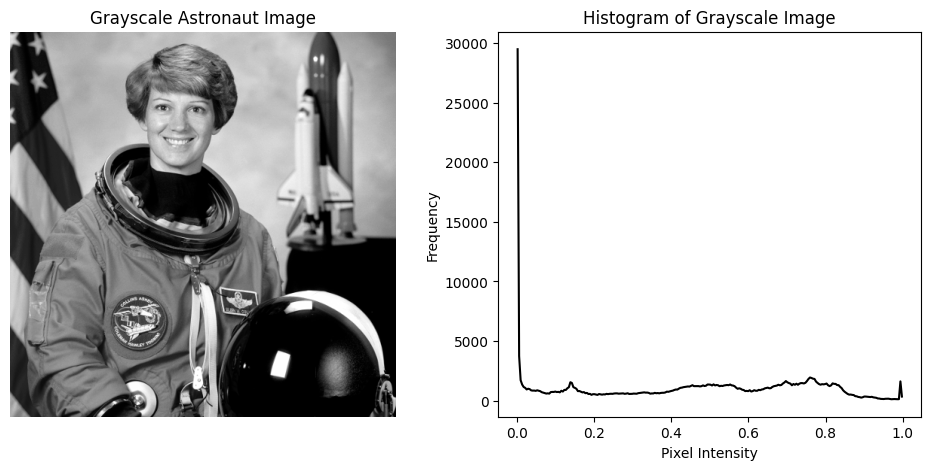

In [9]:
import matplotlib.pyplot as plt
from skimage import data, color, exposure

# Load the astronaut image from skimage's data module
astronaut_image = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_image)

# Compute the histogram of the grayscale image
hist, hist_centers = exposure.histogram(astronaut_gray)

# Plot the grayscale image and its histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display grayscale image
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title("Grayscale Astronaut Image")
axes[0].axis('off')

# Plot histogram
axes[1].plot(hist_centers, hist, color='black')
axes[1].set_title("Histogram of Grayscale Image")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

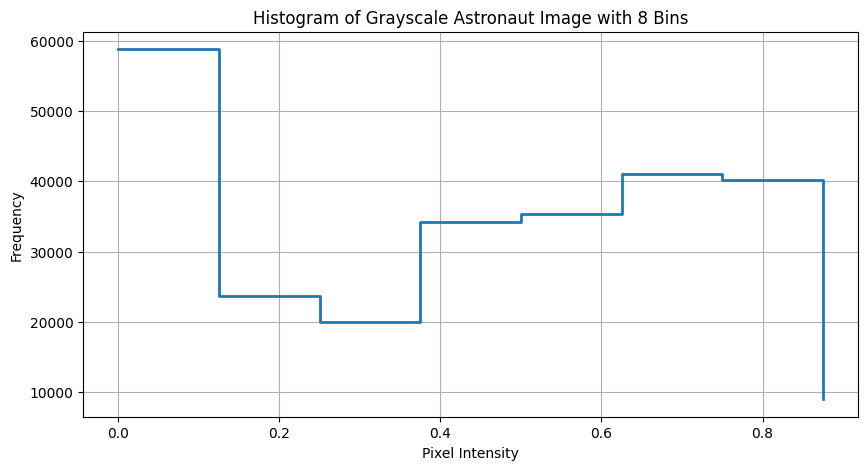

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, color

# Load the astronaut image from skimage's data module
image = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Compute the histogram with 8 bins
hist, bin_edges = np.histogram(gray_image, bins=8, range=(0, 1))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(bin_edges[:-1], hist, lw=2, drawstyle='steps-post')  # Steps-post for histogram-like plot
plt.title("Histogram of Grayscale Astronaut Image with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Changing the bin count in a histogram affects the level of detail we see in the pixel intensity distribution, which can impact our interpretation of the image's contrast and tonal range.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


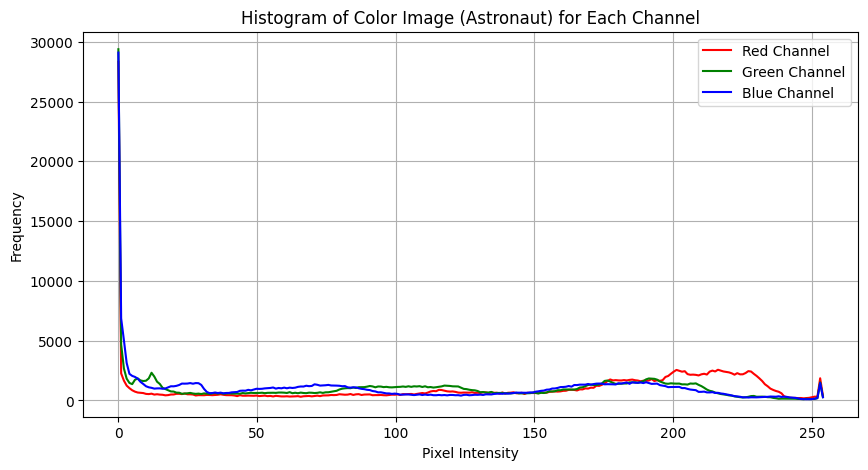

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load the astronaut image from skimage's data module
image = data.astronaut()

# Compute histograms for each color channel (Red, Green, Blue)
hist_r, bin_edges_r = np.histogram(image[:, :, 0], bins=256, range=(0, 255))
hist_g, bin_edges_g = np.histogram(image[:, :, 1], bins=256, range=(0, 255))
hist_b, bin_edges_b = np.histogram(image[:, :, 2], bins=256, range=(0, 255))

# Plot the histograms for each channel on the same plot
plt.figure(figsize=(10, 5))
plt.plot(bin_edges_r[:-1], hist_r, color='red', label='Red Channel', lw=1.5)
plt.plot(bin_edges_g[:-1], hist_g, color='green', label='Green Channel', lw=1.5)
plt.plot(bin_edges_b[:-1], hist_b, color='blue', label='Blue Channel', lw=1.5)

# Adding labels and legend
plt.title("Histogram of Color Image (Astronaut) for Each Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



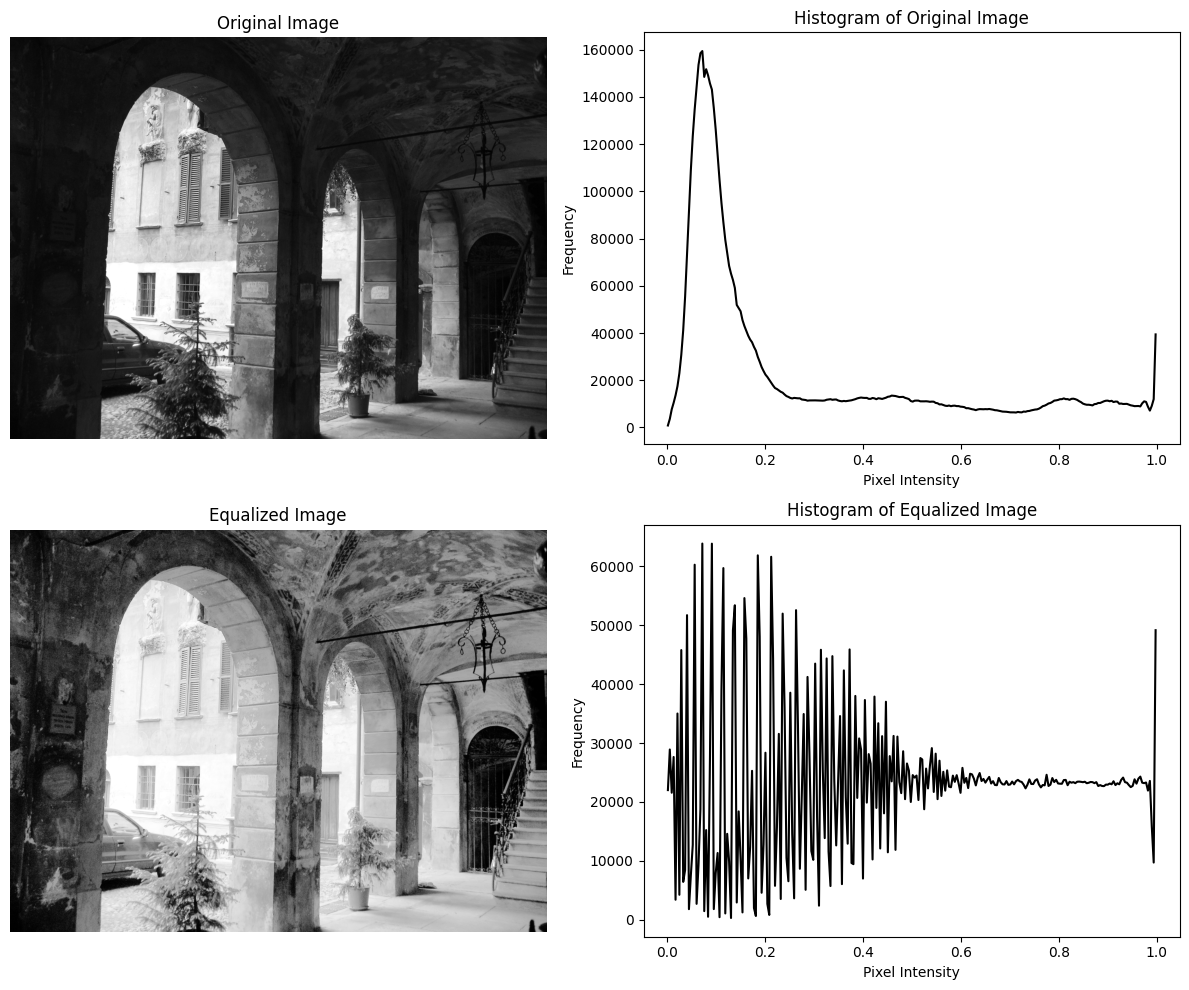

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from skimage import exposure, io, color

# Load the image (assuming the path is correct; adjust if needed)
image_path = 'images/aquatermi_lowcontrast.jpg'
image = io.imread(image_path)

# Convert to grayscale if the image is not already in grayscale
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Compute the histogram of the original image
hist_orig, bin_edges_orig = exposure.histogram(image)

# Perform histogram equalization to enhance contrast
equalized_image = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_eq, bin_edges_eq = exposure.histogram(equalized_image)

# Set up a 2x2 subplot to show original image, equalized image, and their histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Plot the histogram of the original image
axes[0, 1].plot(bin_edges_orig, hist_orig, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Plot the equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis('off')

# Plot the histogram of the equalized image
axes[1, 1].plot(bin_edges_eq, hist_eq, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram Equalization and Linear Contrast Stretching are both contrast enhancement techniques but differ in their approaches and outcomes:

Histogram Equalization:

Uses the cumulative distribution function (CDF) to redistribute pixel intensities, creating a more uniform histogram.
Enhances contrast nonlinearly, bringing out details in both dark and light areas.
Ideal for low-contrast images with clustered intensity values.

Linear Contrast Stretching:

Linearly scales pixel values between the minimum and maximum intensities in the image.
Enhances contrast by expanding the range but retains the original histogram shape.
Suitable for images that need simple intensity range expansion without altering intensity distribution.
In short, histogram equalization redistributes intensities for better detail, while linear stretching simply spreads values across the available range.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

def linear_contrast_stretch(image, bins=256):
    """
    Perform linear contrast stretching on a grayscale image.
    
    Parameters:
        image (numpy array): Grayscale image array.
        bins (int): Number of bins for histogram.
        
    Returns:
        numpy array: Contrast-stretched image array.
    """
    # Find minimum and maximum pixel values in the image
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    
    # Perform linear contrast stretching
    stretched_image = (image - min_pixel) / (max_pixel - min_pixel) * 255
    stretched_image = stretched_image.astype(np.uint8)  # Convert to uint8 for display

    return stretched_image

# Load the image
image_path = 'images/aquatermi_lowcontrast.jpg'
image = io.imread(image_path)

# Convert to grayscale if it's a color image
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Perform linear contrast stretch
enhanced_image = linear_contrast_stretch(image)

# Compute histograms for original and enhanced images
hist_orig, bin_edges_orig = np.histogram(image, bins=bins, range=(0, 1))
hist_enhanced, bin_edges_enhanced = np.histogram(enhanced_image, bins=bins, range=(0, 255))

# Plot original and enhanced images with their histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Plot histogram of the original image
axes[0, 1].plot(bin_edges_orig[:-1], hist_orig, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Plot the enhanced image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Enhanced Image (Linear Contrast Stretch)")
axes[1, 0].axis('off')

# Plot histogram of the enhanced image
axes[1, 1].plot(bin_edges_enhanced[:-1], hist_enhanced, color='black')
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

NameError: name 'bins' is not defined

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
from skimage import data, filters, morphology
from skimage.color import rgb2gray
import numpy as np

# Load the coins image from skimage's data module
image = data.coins()

# Convert to grayscale if it’s not already (for consistency)
if len(image.shape) == 3:
    image = rgb2gray(image)
    image = (image * 255).astype(np.uint8)  # Convert to uint8 format for filtering

# Define structuring elements (disk) with different radii
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

# Apply the mean filter with each structuring element
smoothed_20 = filters.rank.mean(image, selem=selem_20)
smoothed_30 = filters.rank.mean(image, selem=selem_30)
smoothed_10 = filters.rank.mean(image, selem=selem_10)

# Visualize the original and smoothed images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Plot the smoothed image with radius 20
axes[0, 1].imshow(smoothed_20, cmap='gray')
axes[0, 1].set_title("Mean Filter with Radius 20")
axes[0, 1].axis('off')

# Plot the smoothed image with radius 30
axes[1, 0].imshow(smoothed_30, cmap='gray')
axes[1, 0].set_title("Mean Filter with Radius 30")
axes[1, 0].axis('off')

# Plot the smoothed image with radius 10
axes[1, 1].imshow(smoothed_10, cmap='gray')
axes[1, 1].set_title("Mean Filter with Radius 10")
axes[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

TypeError: mean() got an unexpected keyword argument 'selem'

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
from skimage import data, filters, morphology
import numpy as np

# Load the coins image from skimage's data module
image = data.coins()

# Convert to uint8 format for filtering
image = image.astype(np.uint8)

# Define different structuring elements
selem_square = morphology.square(20)     # Square of side length 20
selem_rectangle = morphology.rectangle(30, 15)  # Rectangle 30x15
selem_star = morphology.star(10)         # Star with a specific size
selem_diamond = morphology.diamond(10)   # Diamond with radius 10

# Apply mean filter with each structuring element
smoothed_square = filters.rank.mean(image, selem=selem_square)
smoothed_rectangle = filters.rank.mean(image, selem=selem_rectangle)
smoothed_star = filters.rank.mean(image, selem=selem_star)
smoothed_diamond = filters.rank.mean(image, selem=selem_diamond)

# List of structuring elements and their corresponding smoothed images
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
smoothed_images = [smoothed_square, smoothed_rectangle, smoothed_star, smoothed_diamond]
titles = ["Square", "Rectangle", "Star", "Diamond"]

# Set up a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Display structuring elements in the first row
for i in range(4):
    axes[0, i].imshow(selems[i], cmap='gray')
    axes[0, i].set_title(f"{titles[i]} Selem")
    axes[0, i].axis('off')

# Display smoothed images in the second row
for i in range(4):
    axes[1, i].imshow(smoothed_images[i], cmap='gray')
    axes[1, i].set_title(f"Smoothed with {titles[i]}")
    axes[1, i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

TypeError: mean() got an unexpected keyword argument 'selem'

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Larger Radius: Enhances smoothing and reduces noise but risks losing important details.

Smaller Radius: Preserves details and edges but may not effectively reduce noise.

The choice of radius depends on the desired balance between detail preservation and noise reduction in the image processing task.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Square: Uniform smoothing; potential blockiness and loss of detail.

Rectangle: Directional smoothing; better noise reduction in specific orientations while preserving detail in perpendicular directions.

Star: Unique smoothing pattern; maintains some edge detail while effectively reducing noise.

Diamond: Balances uniform and directional smoothing; preserves diagonal features and corners better than rigid shapes.

In conclusion, the choice of structuring element significantly influences the filtering outcome, affecting the degree of smoothing, noise reduction, and detail preservation. Selecting the appropriate selem shape depends on the specific characteristics of the image and the desired results in terms of edge retention and texture clarity.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean Filter: Averages pixel values uniformly; simple and effective for noise reduction but may introduce artifacts and lose details.

Gaussian Filter: Uses weighted averaging based on a Gaussian distribution; provides smoother results and better edge preservation.

In practice, the choice between mean and Gaussian filters depends on the specific requirements of the image processing task, particularly in terms of the importance of preserving image details versus reducing noise.